In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

In [2]:
df = pd.read_csv('voice.csv')

In [3]:
df=df.dropna()

In [4]:
df.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
df['label'] = df.label.map({'female': 0, 'male': 1})

In [6]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


In [7]:
X=df.iloc[:,:-1].values
Y=df['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 39)
labels=Y.unique()

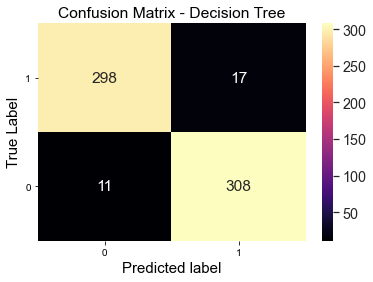

<Figure size 720x504 with 0 Axes>


Training Score :  0.9731649565903709
Testing Score :  0.9558359621451105


In [9]:
#Descision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
dfc = DecisionTreeClassifier(max_depth =3, random_state = 42)
dfc.fit(X_train, y_train)
test_pred_decision_tree = dfc.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sn.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sn.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
print()
print("Training Score : ",dfc.score(X_train,y_train))
print("Testing Score : ",dfc.score(X_test,y_test))

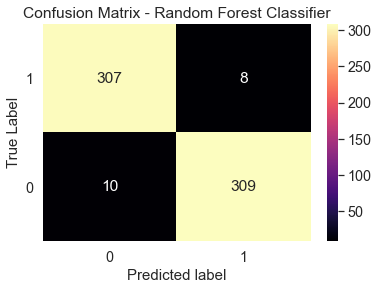

<Figure size 720x504 with 0 Axes>


Training Score :  1.0
Testing Score :  0.9716088328075709


In [12]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
test_pred_decision_tree= rfc.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sn.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sn.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
print()
print("Training Score : ",rfc.score(X_train,y_train))
print("Testing Score : ",rfc.score(X_test,y_test))

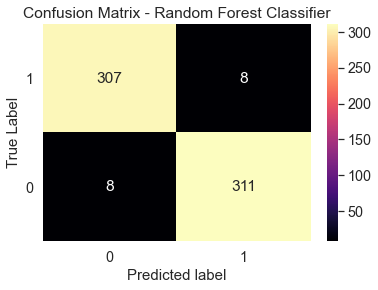

<Figure size 720x504 with 0 Axes>

training Score :  0.9865824782951855
testing Score :  0.9747634069400631


In [23]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors =5)
clf.fit(X_train, y_train)
training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
dd = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,dd)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sn.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sn.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
print('training Score : ',training_score)
print('testing Score : ',test_score)

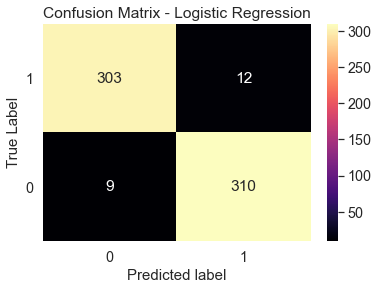

<Figure size 720x504 with 0 Axes>


training Score :  0.9771112865035517
testing Score :  0.9668769716088328


In [24]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
regr=LogisticRegression()
regr.fit(X_train,y_train)
training_score = regr.score(X_train, y_train)
test_score = regr.score(X_test, y_test)
dd = regr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,dd)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sn.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sn.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Logistic Regression')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
print()
print('training Score : ',training_score)
print('testing Score : ',test_score)

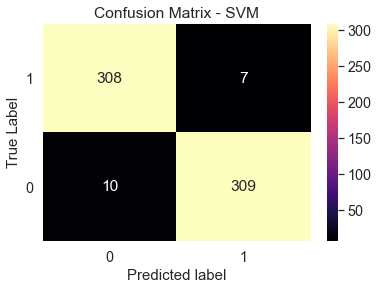

<Figure size 720x504 with 0 Axes>


Accuracy for training set for svm = 0.9861878453038674
Accuracy for test set for svm = 0.973186119873817


In [26]:
# Support Vector Machine 
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)
da = classifier.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,da)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sn.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sn.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - SVM')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


In [27]:
# Random forest has the highest test accuracy 